 ## <font color='White' face='Time New Roman'> NON-LIFE INSURANCE FUNCTIONALITY: Vehicle Insurance Fraud Detection</font> 

 **<font color='brown' face='Time New Roman'>1. study and analyze the dataset</font>**

**<font color='green' face='Time New Roman'>Importing packages**

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.decomposition import PCA

**<font color='green' face='Time New Roman'>Importing the dataset**

In [3]:
df1 = pd.read_csv('insurance_fraud_dataset.csv')
df1.head() #displaying the 5 first lines of the dataset
df1.tail() #displaying the 5 last lines of the dataset
df1.info() #get some informations about the data set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

**<font color='green' face='Time New Roman'>Dataset Cleanup**

In [4]:
df1.isnull().sum() # checkin the nan values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [5]:
# Remove Lines with NAN Values 
df1.dropna(subset=['authorities_contacted'], inplace=True)
# Drop the '_c39' column
df1.drop('_c39', axis=1, inplace=True)
df1

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
5,256,39,104594,2006-10-12,OH,250/500,1000,1351.10,0,478456,...,2,NO,64100,6410,6410,51280,Saab,95,2003,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


**<font color='green' face='Time New Roman'>Summary statistics**


       months_as_customer         age  policy_number  policy_deductable  \
count          909.000000  909.000000     909.000000         909.000000   
mean           205.027503   39.040704  546080.628163        1131.463146   
std            116.003078    9.192118  256283.335105         611.958791   
min              0.000000   19.000000  100804.000000         500.000000   
25%            116.000000   32.000000  337677.000000         500.000000   
50%            202.000000   38.000000  532330.000000        1000.000000   
75%            278.000000   45.000000  757644.000000        2000.000000   
max            479.000000   64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count             909.000000    9.090000e+02     909.000000     909.000000   
mean             1256.597712    1.088009e+06  500597.042904   24823.652365   
std               245.236621    2.278747e+06   71474.927903   27719.509214   
min         

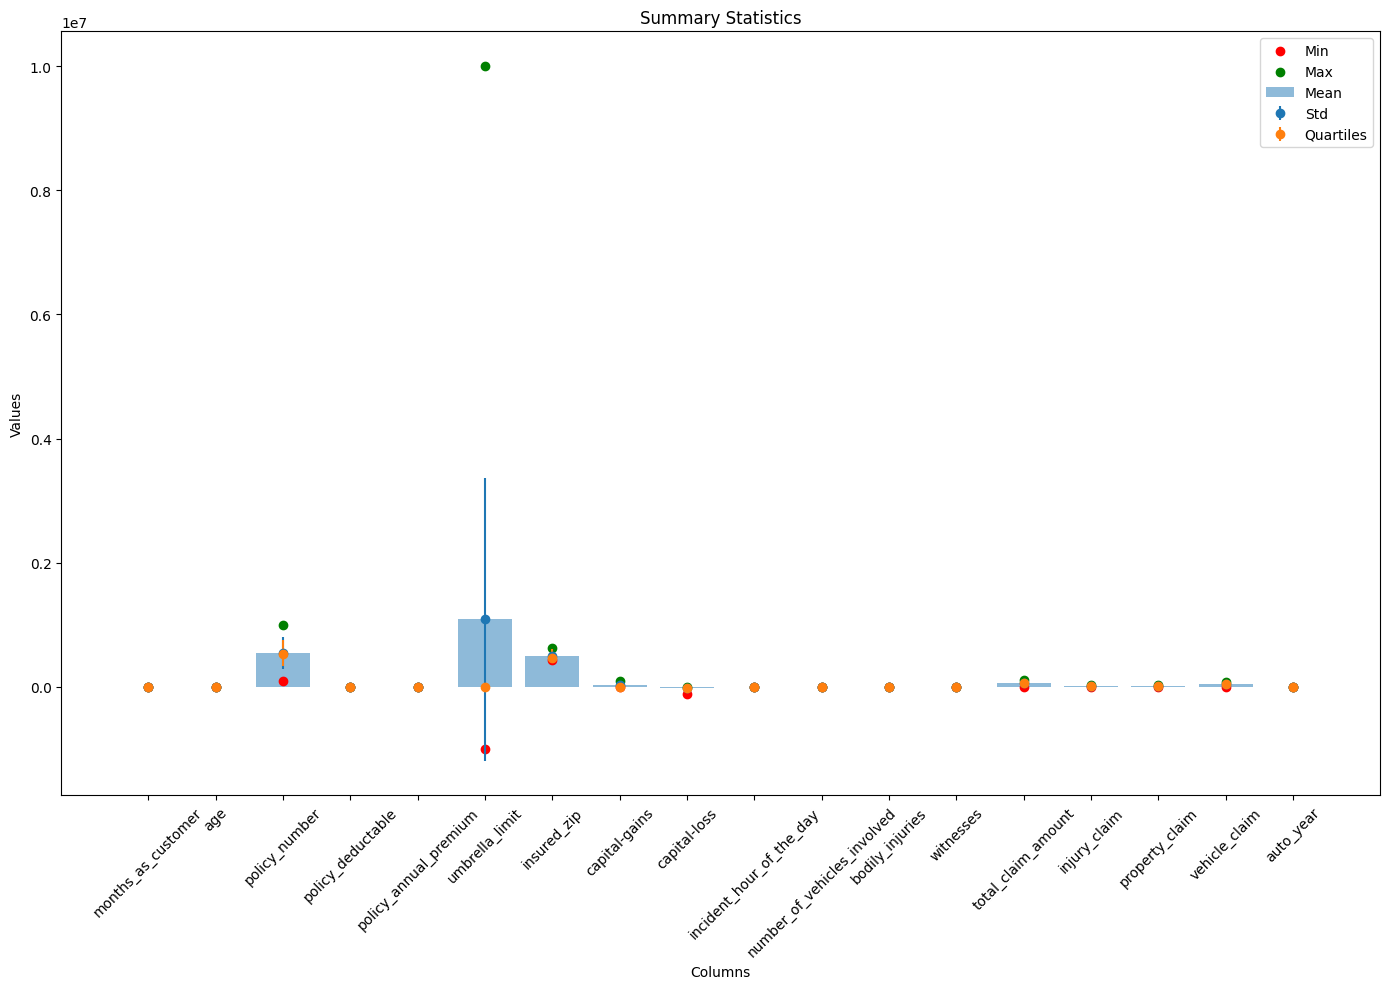

In [6]:

# We print the mean, std, min, max, the 25-50-75% quartiles of each culumn
# Calculate summary statistics
summary_stats = df1.describe()

# Extracting summary statistics for plotting
means = summary_stats.loc['mean']
stds = summary_stats.loc['std']
mins = summary_stats.loc['min']
maxs = summary_stats.loc['max']
quartiles = summary_stats.loc[['25%', '50%', '75%']]


print(summary_stats)
# Creating bar plots for summary statistics
plt.figure(figsize=(14,10))

# Mean
plt.bar(means.index, means.values, alpha=0.5, label='Mean')

# Standard Deviation
plt.errorbar(stds.index, means.values, yerr=stds.values, fmt='o', label='Std')

# Min and Max
plt.scatter(mins.index, mins.values, color='red', marker='o', label='Min')
plt.scatter(maxs.index, maxs.values, color='green', marker='o', label='Max')

# Quartiles
plt.errorbar(quartiles.columns, quartiles.loc['50%'], yerr=[quartiles.loc['50%'] - quartiles.loc['25%'], quartiles.loc['75%'] - quartiles.loc['50%']], fmt='o', label='Quartiles')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Summary Statistics')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**<font color='green' face='Time New Roman'>Fraud Distribution**


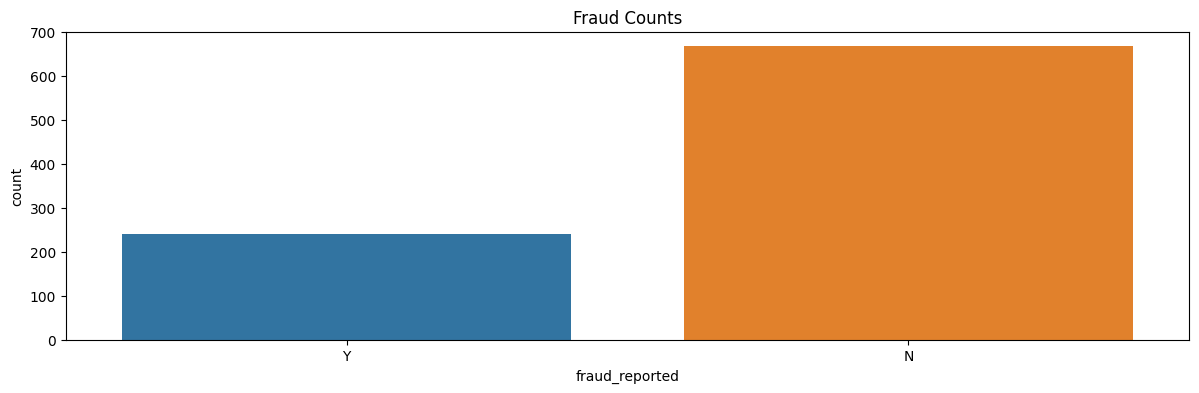

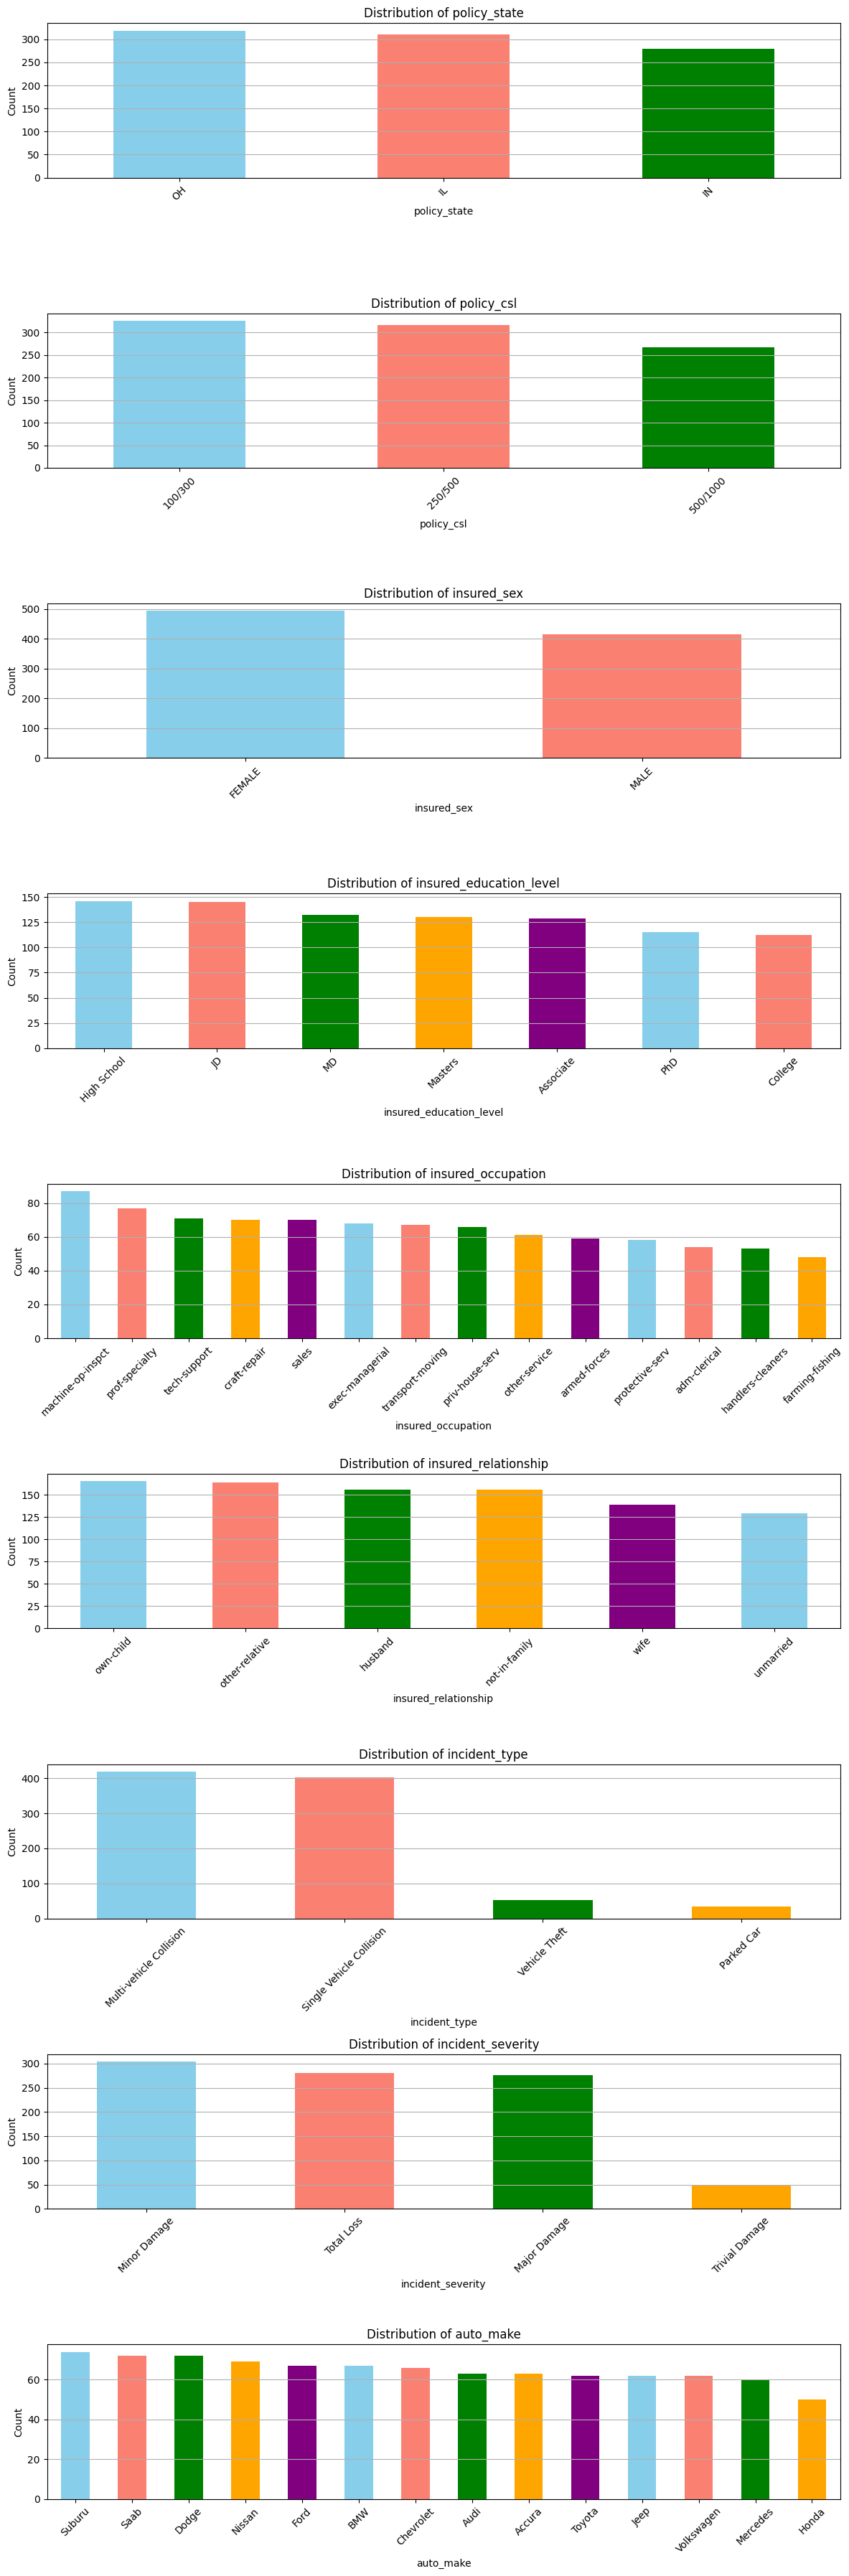

In [8]:
# Fraud counts
plt.figure(figsize=(14.5, 4))
sns.countplot(x='fraud_reported', data=df1)
plt.title('Fraud Counts')
plt.show()
# Fraud By categories

# Selecting specific categorical columns
selected_categorical_columns = [
    'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level',
    'insured_occupation', 'insured_relationship', 'incident_type',
    'incident_severity', 'auto_make'
]

# Create subplots for bar plots
fig, axs = plt.subplots(len(selected_categorical_columns), 1, figsize=(12, 4 * len(selected_categorical_columns)))

# Define a color palette for the bars
colors = ['skyblue', 'salmon', 'green', 'orange', 'purple']  # Add more colors if needed

# Plotting bar plots for each selected categorical column
for i, col in enumerate(selected_categorical_columns):
    category_counts = df1[col].value_counts()
    
    # Plotting with custom colors
    category_counts.plot(kind='bar', color=colors[:len(category_counts)], ax=axs[i])
    
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Count')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].grid(axis='y')

plt.tight_layout()
plt.show()


**<font color='green' face='Time New Roman'>Feature Distributions**


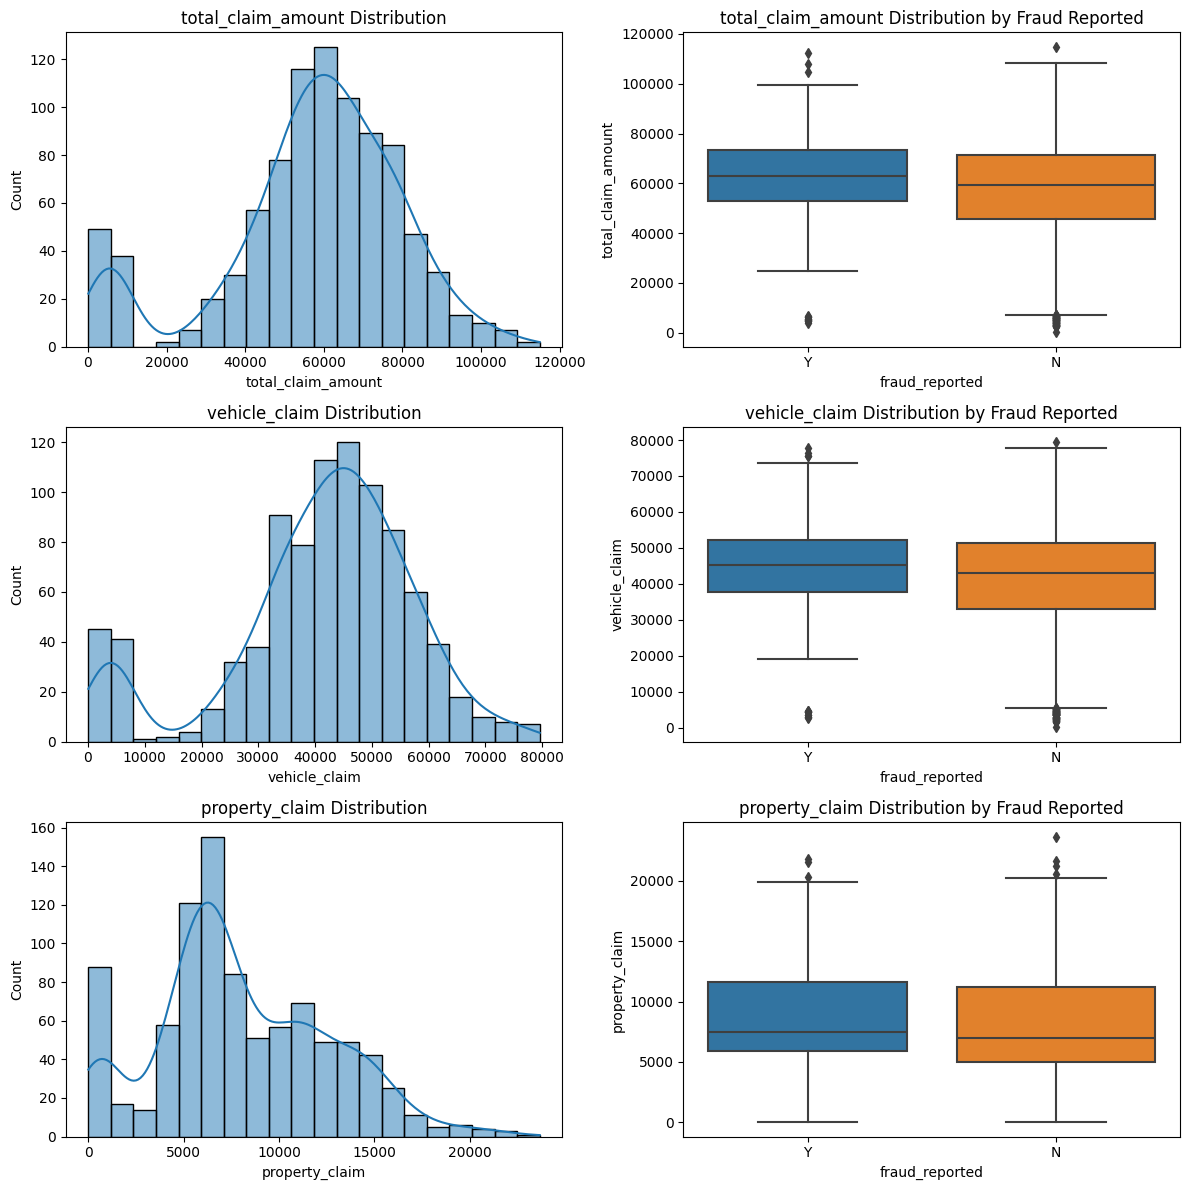

In [9]:
# Histograms/Boxplots (Numerical)
selected_numerical_columns = ['total_claim_amount', 'vehicle_claim', 'property_claim']

fig, axes = plt.subplots(nrows=len(selected_numerical_columns), ncols=2, figsize=(12, 12))

for i, col in enumerate(selected_numerical_columns):
    sns.histplot(df1[col], ax=axes[i][0], bins=20, kde=True)
    axes[i][0].set_title(f'{col} Distribution')

    sns.boxplot(x='fraud_reported', y=col, data=df1, ax=axes[i][1])
    axes[i][1].set_title(f'{col} Distribution by Fraud Reported')

plt.tight_layout()
plt.show()

**<font color='green' face='Time New Roman'>Correlation Matrix**


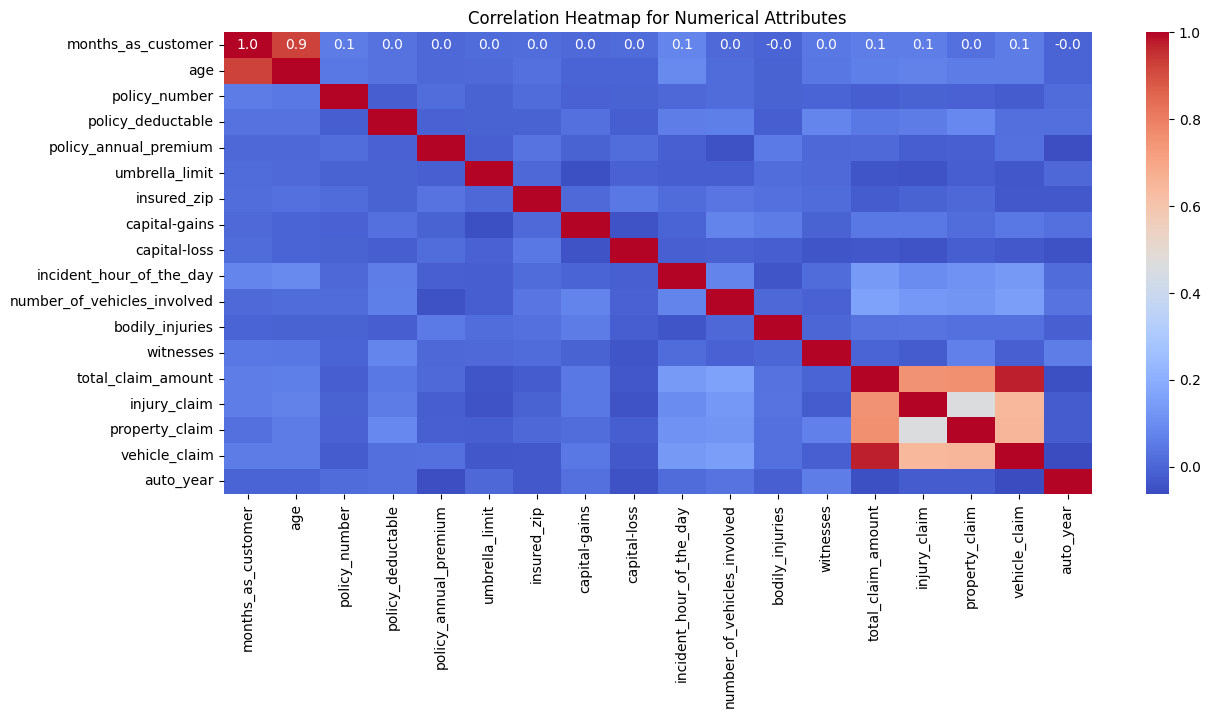

In [11]:
# select  numerical ttributes (int64 and float64)
numerical_columns = df1.select_dtypes(include=['float64', 'int64'])

# Calcul of Correlation matrix
corr_matrix_numerical = numerical_columns.corr()

# Create an Correlation Heatmap for Numerical Attributes
plt.figure(figsize=(14, 6))
sns.heatmap(corr_matrix_numerical, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={"size": 10})
plt.title('Correlation Heatmap for Numerical Attributes')
plt.show()


 **<font color='brown' face='Time New Roman'>2. Preprocessing</font>**

**<font color='green' face='Time New Roman'>Mannually & Label_Encoder**

In [12]:
# Encoding categorical columns manually
df1['policy_state'] = df1['policy_state'].replace({'OH': 1, 'IN': 2, 'IL': 3})
df1['insured_sex'] = df1['insured_sex'].replace({'MALE': 1, 'FEMALE': 2})
df1['insured_education_level'] = df1['insured_education_level'].replace({
    'MD': 1, 'PhD': 2, 'Associate': 3, 'High School': 4, 'College': 5, 'JD': 6, 'Masters': 7})
df1['authorities_contacted'] = df1['authorities_contacted'].replace({
    'Police': 1, 'None': 4, 'Fire': 3, 'Ambulance': 2, 'Other': 5})

# Encoding 'fraud_reported' as binary values
df1['fraud_reported'] = df1['fraud_reported'].replace({'Y': 1, 'N': 0})

# Modifying columns with binary data and 2 when the value is unknown
df1['police_report_available'] = df1['police_report_available'].replace({
    'YES': 1, 'NO': 0, '?': 2})
df1['property_damage'] = df1['property_damage'].replace({
    'YES': 1, 'NO': 0, '?': 2})

# Automatic Label Encoding for string columns
string_columns = df1.select_dtypes(include=['object']).columns

# Creating a LabelEncoder instance and applying it to string columns
label_encoder = LabelEncoder()
df1[string_columns] = df1[string_columns].apply(lambda col: label_encoder.fit_transform(col))

# Now the type of all attributes is float or integer !!!!

**<font color='green' face='Time New Roman'>Principal Component Analysis (PCA)**

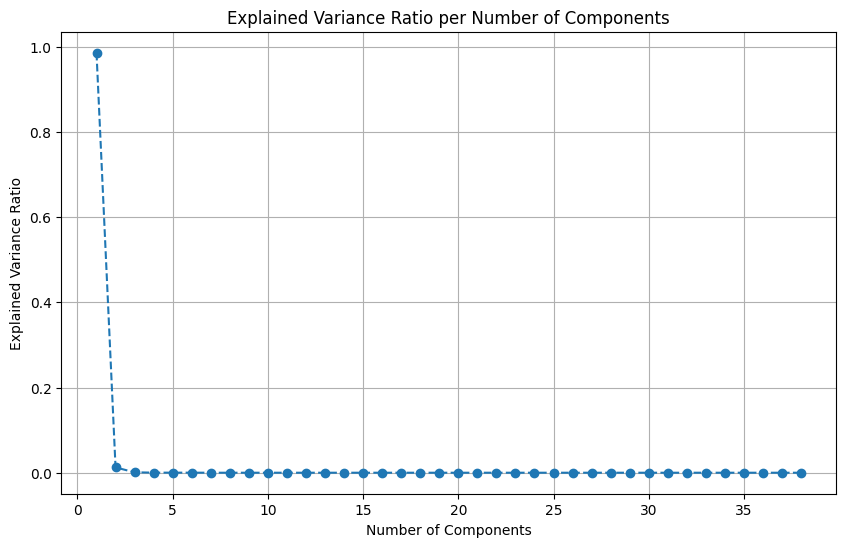

In [14]:
# Select feature columns
features = df1.iloc[:, :-1]  # Excludes the target column

# Initialize PCA with the maximum number of components
pca = PCA()

# Apply PCA to the selected features
features_pca = pca.fit(features)

# Plot the explained variance graph by the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(features_pca.explained_variance_ratio_) + 1), features_pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Number of Components')
plt.grid(True)
plt.show()


 **<font color='brown' face='Time New Roman'>3. Machine Learning</font>**

**<font color='green' face='Time New Roman'>1. LogisticRegression**

In [16]:
# Features list
features = ['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
            'policy_state', 'policy_csl', 'policy_deductable',
            'policy_annual_premium', 'umbrella_limit', 'insured_sex',
            'insured_education_level', 'insured_occupation', 'insured_hobbies',
            'insured_relationship', 'capital-gains', 'capital-loss',
            'incident_date', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city',
            'incident_location', 'incident_hour_of_the_day',
            'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
            'witnesses', 'police_report_available', 'total_claim_amount',
            'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
            'auto_model', 'auto_year']

# Separate features and target variable
X = df1[features]
y = df1['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [21]:
# Create a logistic regression classifier model with a different solver and higher number of iterations
logreg = LogisticRegression(solver='saga', max_iter=1000, random_state=70)

# Train the model on the training data
logreg.fit(X_train, y_train)

c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, random_state=70, solver='saga')

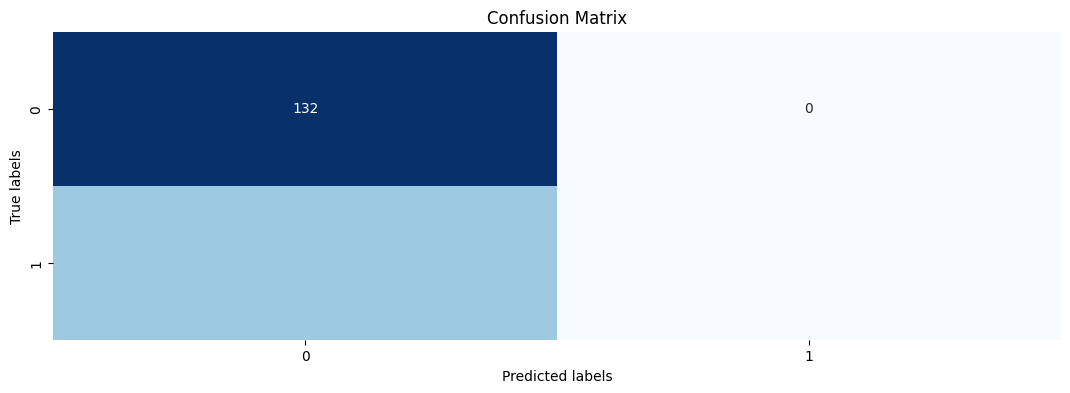

Classification Report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       132
           1       0.00      0.00      0.00        50

    accuracy                           0.73       182
   macro avg       0.36      0.50      0.42       182
weighted avg       0.53      0.73      0.61       182

Accuracy: 0.7253
Precision: 0.0000
Recall: 0.0000
F1-Score: 0.0000


c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\BUNICE\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [22]:
# Predict on the test set
y_pred = logreg.predict(X_test)


# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(13, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
# Calculate and display classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

# Calculate and display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate and display precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# Calculate and display recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# Calculate and display F1-score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

**<font color='green' face='Time New Roman'>2. Polynomial Regression**

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Degrees to test
degrees = [1,2,3]

# Initialize lists for storing predictions for each polynomial degree
predicted_values_list = []

for degree in degrees:
    # Create the polynomial regression model
    polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model on the training data
    polyreg.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = polyreg.predict(X_test)
    
    # Add the predictions to the list
    predicted_values_list.append(y_pred)

# Concatenate the predictions into a DataFrame
predictions_df = pd.DataFrame(predicted_values_list, index=degrees).transpose()

# Add a column for the true values 'fraud_reported'
predictions_df['fraud_reported'] = y_test.values

# For each prediction column, calculate the accuracy
for col in predictions_df.columns[:-1]:  # Exclude the 'fraud_reported' column
    accuracy = accuracy_score(predictions_df['fraud_reported'], predictions_df[col].round())
    print(f"Accuracy for degree {col}: {accuracy * 100:.2f}%")

polyreg.fit(X_train, y_train)

Accuracy for degree 1: 74.73%
Accuracy for degree 2: 21.43%
Accuracy for degree 3: 19.78%


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression())])


**<font color='green' face='Time New Roman'>3. RandomForestClassifier**

In [24]:
# Split the data into training and test sets
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Initialize the random forest model
forest = RandomForestClassifier(random_state=42)

# Train the model
forest.fit(x_train, Y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.945054945054945


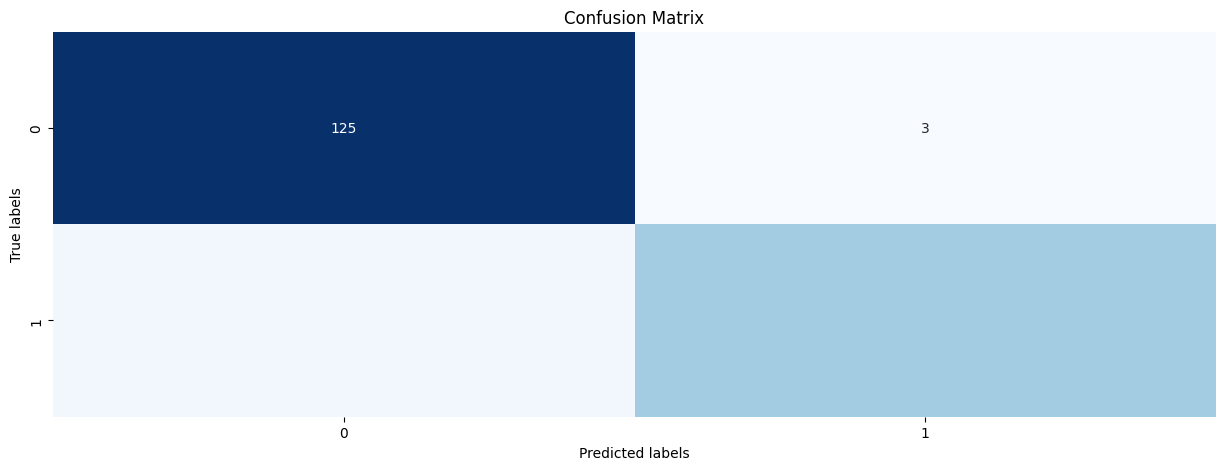

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       128
           1       0.94      0.87      0.90        54

    accuracy                           0.95       182
   macro avg       0.94      0.92      0.93       182
weighted avg       0.94      0.95      0.94       182



In [25]:
# Make predictions
y_pred_forest = forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_forest)
print(f"Accuracy: {accuracy}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_forest)
plt.figure(figsize=(15, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Classification report
report = classification_report(y_test, y_pred_forest)
print("Classification Report:")
print(report)

**<font color='green' face='Time New Roman'>4. Random Forest**

In [26]:
# Initialize lists to store scores
train_scores = []
test_scores = []
valid_scores = []

# Initialize the best accuracy and corresponding n_estimators and max_depth
best_accuracy = 0.0
best_n_estimators = 0
best_max_depth = 0

# Different test sizes, n_estimators, and max_depth values
test_sizes = [0.2,0.15,0.25]
n_estimators_values = [25,50,100,150]
max_depth_values = [5, 6, 10] 

for test_size in test_sizes:
    for n_estimators_value in n_estimators_values:
        for max_depth_value in max_depth_values:
            # Split data into training and test sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=5)

            # Adjust the size of the validation set based on the test set
            val_size = 0.15 * (1 - test_size)
            X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=val_size, random_state=5)

            # Initialize Random Forest regression model
            rf_regressor = RandomForestRegressor(n_estimators=n_estimators_value, max_depth=max_depth_value, random_state=5)
            rf_regressor.fit(X_train, y_train)

            # Predict on the test set
            y_pred_test = rf_regressor.predict(X_test)

            # Calculate accuracy for the test set
            accuracy = accuracy_score(np.round(y_test), np.round(y_pred_test))

            # Check if this model has a better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_n_estimators = n_estimators_value
                best_max_depth = max_depth_value

            print(f"Accuracy for test size {test_size}, n_estimators {n_estimators_value}, and max_depth {max_depth_value}: {accuracy * 100:.2f}%")

# Print the best result
print(f"\nBest accuracy achieved ({best_accuracy * 100:.2f}%) with n_estimators = {best_n_estimators} and max_depth = {best_max_depth}.")

Accuracy for test size 0.2, n_estimators 25, and max_depth 5: 84.07%
Accuracy for test size 0.2, n_estimators 25, and max_depth 6: 82.97%
Accuracy for test size 0.2, n_estimators 25, and max_depth 10: 82.97%
Accuracy for test size 0.2, n_estimators 50, and max_depth 5: 85.71%
Accuracy for test size 0.2, n_estimators 50, and max_depth 6: 84.62%
Accuracy for test size 0.2, n_estimators 50, and max_depth 10: 82.97%
Accuracy for test size 0.2, n_estimators 100, and max_depth 5: 85.16%
Accuracy for test size 0.2, n_estimators 100, and max_depth 6: 84.62%
Accuracy for test size 0.2, n_estimators 100, and max_depth 10: 84.07%
Accuracy for test size 0.2, n_estimators 150, and max_depth 5: 85.71%
Accuracy for test size 0.2, n_estimators 150, and max_depth 6: 85.71%
Accuracy for test size 0.2, n_estimators 150, and max_depth 10: 85.71%
Accuracy for test size 0.15, n_estimators 25, and max_depth 5: 85.40%
Accuracy for test size 0.15, n_estimators 25, and max_depth 6: 87.59%
Accuracy for test size